# 활성화 함수


In [4]:
import numpy as np
import matplotlib.pyplot as plt

### 1. heaviside step function
- 미분 불가능 -> 학습 불가능!

In [2]:
xs = np.linspace(-5, 5, 501)

In [3]:
def heaviside(x):
  y = np.zeros_like(x)
  y[x>0] = 1
  return y

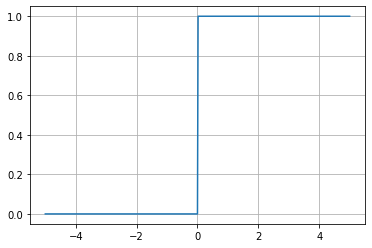

In [5]:
plt.plot(xs, heaviside(xs))
plt.grid()
plt.show()

### 2. sigmoid function
- f(x) = 1/(1 + e^-x)
- 이진 분류에서 사용


In [6]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

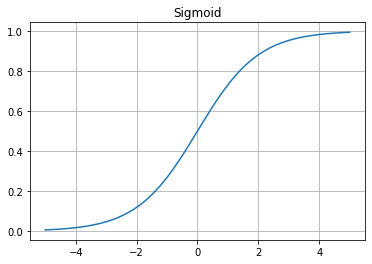

In [8]:
plt.plot(xs, sigmoid(xs))
plt.grid()
plt.title('Sigmoid')
plt.show()

### 3. hyperbolic tangent
- f(x) = tanh(x)
- `np.tanh()`
- 시그모이드 함수의 범위 -> -1 ~ 1 의 범위로 확장 
- 미분값의 범위가 함계 확장되는 효과
- 하지만 여전히 1보다 작은 값 존재 -> 기울기 소실 문제 여전히 존재

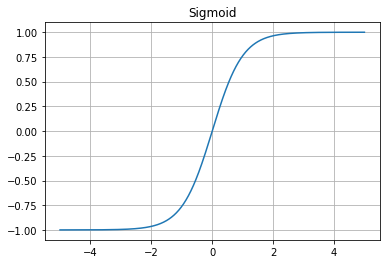

In [9]:
plt.plot(xs, np.tanh(xs))
plt.grid()
plt.title('Sigmoid')
plt.show()

3. ReLU (Rectified Linear Unit)
- f(x) = x (x>0) / f(x) = 0 (x<=0)
- `np.maximum()`
- 은닉층에서는 ReLU를 씀을 알아두기


In [13]:
def relu(x):
  return np.maximum(0, x)

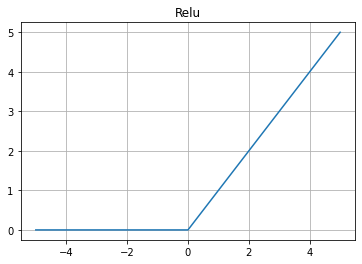

In [14]:
plt.plot(xs, relu(xs))
plt.grid()
plt.title('Relu')
plt.show()

### 3. leaky Relu 

In [15]:
def leaky_relu(x):
  return np.maximum(0.01*x, x)

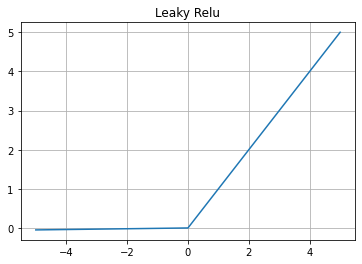

In [17]:
plt.plot(xs, leaky_relu(xs))
plt.grid()
plt.title('Leaky Relu')
plt.show()
# -4 미만 자세히 보면 0이 아님!

### 4. Softplus
- f(x) = log(1 + e^x)
- 0을 만드는 기준 완화 

In [18]:
def softplus(x):
  return np.log(1 + np.exp(x))

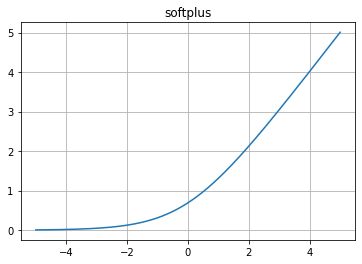

In [19]:
plt.plot(xs, softplus(xs))
plt.grid()
plt.title('softplus')
plt.show()

### 5. Softmax
- f(x) = e^xi / sum(e^xi)
- 결과의 총 합이 항상 1인 형태로 바꿔주는 활성화 함수
- one-hot encoding 형태와 비슷
- 손실 함수: 교차 엔트로피 `categorical_crossentropy`
- 결과 값이 교차 엔트로피 (categorical_crossentropy) 지나 하나만 1이고 나머지는 0인 형태로 전환 가능 

In [21]:
def softmax(x):
  return np.exp(x) / np.sum(np.exp(x))

In [24]:
# overflow 방지 위한 함수
def softmax_1(x):
  x = x - np.max(x) # overflow 방지
  return np.exp(x) / np.sum(np.exp(x))

In [22]:
# one-hot encoding 형태로 표현 가능! 
yhat = np.array([-1, 1, 3])
softmax(yhat)

array([0.01587624, 0.11731043, 0.86681333])

In [25]:
yhat = np.array([-1, 1, 3])
softmax_1(yhat)

array([0.01587624, 0.11731043, 0.86681333])